In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import time
import tensorflow as tf

## Load the data from the file

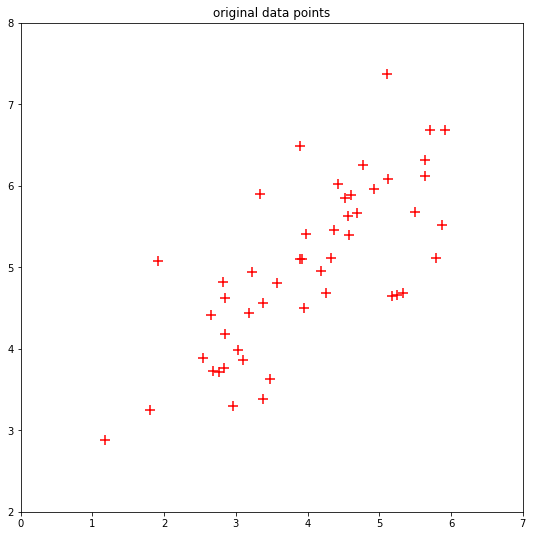

<class 'numpy.ndarray'> [3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 3.47581 5.9113  3.92889
 4.56184 4.57407 4.37173 4.19169 5.24409 2.83584 5.63527 4.68633 2.85051
 5.11016 5.18256 5.70733 3.57968 5.63938 4.26347 2.53652 3.22383 4.92949
 5.79296 2.81685 3.88882 3.34323 5.87973 3.10392 5.33151 3.37543 4.77668
 2.67575 5.50028 1.7971  4.32251 4.421   3.1793  3.03354 4.60935 2.96379
 3.97176 1.18023 1.91895 3.95525 5.11795]


In [18]:
data = np.loadtxt('data-pca.txt', delimiter=',')

x = data[:,0]
y = data[:,1]

plt.figure(1,figsize=(9,9))
plt.scatter(x, y, s=100, c='r', marker='+', label='data')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.title('original data points')
plt.show()
print(type(x), x)

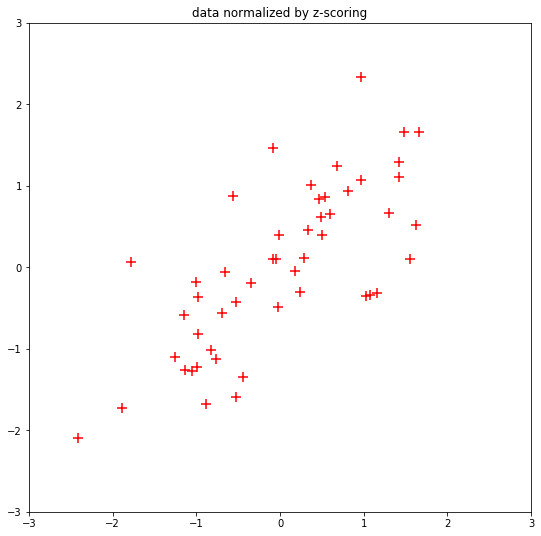

In [17]:
xn, yn = normalize_data(x, y)

plt.figure(2,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('data normalized by z-scoring')
plt.show()

## Define funcitons

In [14]:
def normalize_data(x, y):
    
    xn = np.zeros(len(x))
    yn = np.zeros(len(y))

    xn = (x - np.mean(x)) / np.std(x) # normalize x. the mean of xn is zero and the standard deviation of xn is one #
    yn = (y - np.mean(y)) / np.std(y)# normalize y. the mean of yn is zero and the standard deviation of yn is one #

    return xn, yn


# def compute_covariance(x, y):

#     covar = # compute the covariance matrix #
    
#     return covar


# def compute_principal_direction(covariance):

#     direction = # compute the principal directions from the co-variance matrix #
    
#     return direction


# def compute_projection(point, axis):

#     projection = # compute the projection of point on the axis #
    
#     return projection


# def compute_distance(point1, point2):

#     distance = # compute the Euclidean distance between point1 and point2 #
    
#     return distance


## 1. Plot the original data points [1pt]

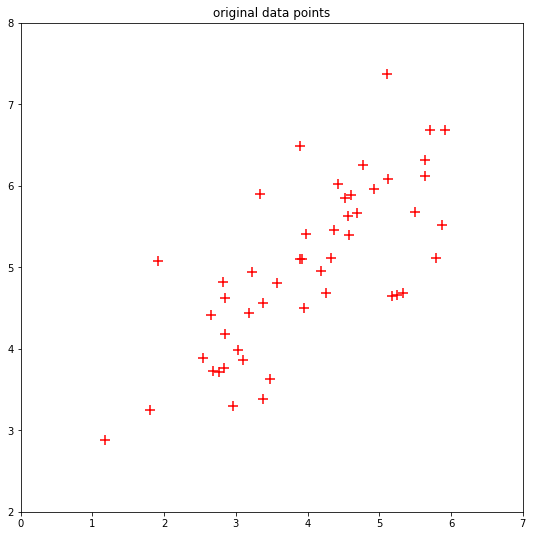

<class 'numpy.ndarray'> [3.38156 4.52788 2.65568 2.76523 2.84656 3.89067 3.47581 5.9113  3.92889
 4.56184 4.57407 4.37173 4.19169 5.24409 2.83584 5.63527 4.68633 2.85051
 5.11016 5.18256 5.70733 3.57968 5.63938 4.26347 2.53652 3.22383 4.92949
 5.79296 2.81685 3.88882 3.34323 5.87973 3.10392 5.33151 3.37543 4.77668
 2.67575 5.50028 1.7971  4.32251 4.421   3.1793  3.03354 4.60935 2.96379
 3.97176 1.18023 1.91895 3.95525 5.11795]


In [19]:
plt.figure(1,figsize=(9,9))
plt.scatter(x, y, s=100, c='r', marker='+', label='data')
plt.xlim(0, 7)
plt.ylim(2, 8)
plt.title('original data points')
plt.show()
print(type(x), x)

## 2. Plot the normalized data points [1pt]

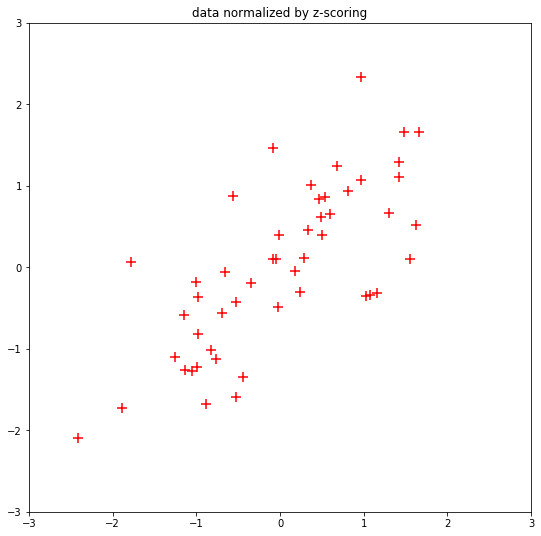

In [20]:
plt.figure(2,figsize=(9,9))
plt.scatter(xn, yn, s=100, c='r', marker='+', label='data')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.title('data normalized by z-scoring')
plt.show()

## 3. Plot the principal axes [2pt]

## 4. Plot the first principal axis [3pt]

## 5. Plot the project of the normalized data points onto the first principal axis [4pt]

## 6. Plot the lines between the normalized data points and their projection points on the first principal axis [3pt]

## 7. Plot the second principal axis [3pt]

## 8. Plot the project of the normalized data points onto the second principal axis [4pt]

## 9. Plot the lines between the normalized data points and their projection points on the second principal axis [3pt]